In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:,.2f}'.format

# print every command of cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_gameaccess = pd.read_csv("gameaccess.csv")

In [3]:
df_gameaccess.info()
df_gameaccess.shape
df_gameaccess.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,093,380.11","2,063,506.89","2,447.64","3,838,206.11","1,774,699.22",5.57,2.49,0.85,...,"6,694,684.72","2,121,103.87","3,133,967.11","161,775.85","242,663.77",48.47,"1,136.76",14.02,0.25,0.55
std,15.44,15.44,"985,015.25","973,414.67","1,387.43","1,982,451.54","1,034,633.71",0.91,0.54,0.28,...,"3,413,192.11","1,045,760.76","2,959,102.41","301,186.93","435,678.56",7.80,176.96,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"1,652,299.00","1,629,127.00","1,549.00","2,658,687.00","1,075,086.00",5.46,2.36,0.71,...,"4,032,785.34","1,341,376.06","1,807,830.05",0.00,0.00,46.93,"1,065.86",6.00,0.00,0.00
50%,26.00,53.00,"2,197,702.00","2,166,128.00","2,416.00","3,859,542.00","1,748,871.50",5.67,2.55,0.80,...,"8,146,156.33","2,591,409.68","2,156,032.09",0.00,0.00,48.79,"1,194.00",13.00,0.00,0.00
75%,39.00,66.00,"2,557,704.00","2,529,027.00","3,013.00","4,859,000.00","2,407,927.00",5.83,2.71,0.94,...,"9,329,621.50","2,830,316.33","2,864,752.26","257,632.26","347,458.06",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"4,935,168.80","4,865,197.80","7,797.00","9,665,991.00","4,800,793.20",8.00,4.00,2.28,...,"10,104,067.34","3,055,459.35","13,236,320.98","1,119,367.74","1,679,051.61",59.99,"1,242.00",30.00,3.00,7.00


In [4]:
df_gameaccess = df_gameaccess.loc[:, ~df_gameaccess.columns.str.contains('^Unnamed')]
df_gameaccess.head()
df_gameaccess.shape
df_gameaccess = df_gameaccess.dropna()
df_gameaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"455,657.61","189,484.11","1,884,505.32",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

<Figure size 1440x1080 with 0 Axes>

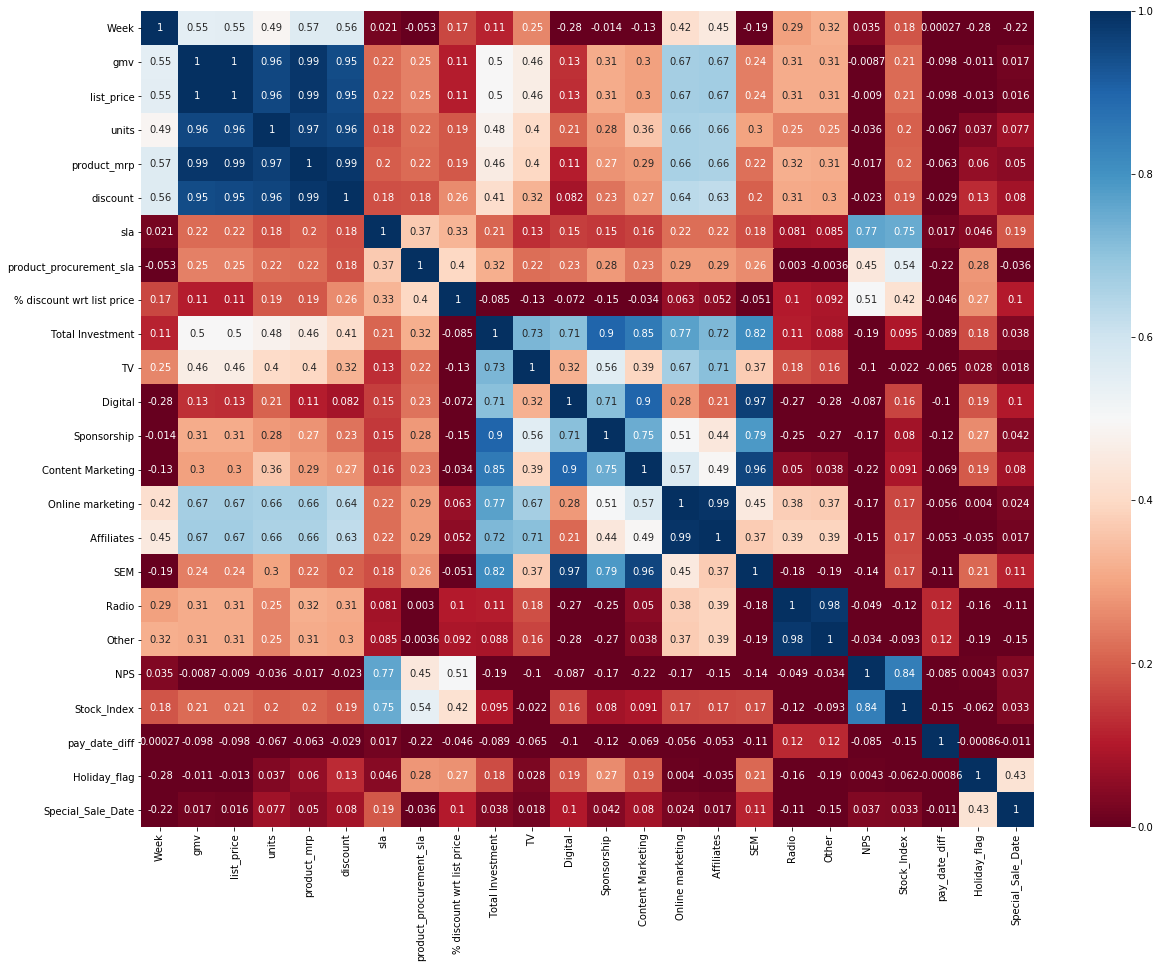

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df_gameaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [6]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [7]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_gameaccess.columns)
##num_vars.remove('gmv')
num_vars
df_gameaccess[num_vars] = scaler.fit_transform(df_gameaccess[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [8]:
df_gameaccess.shape

(53, 24)

In [9]:
df_gameaccess.head()
df_gameaccess.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.75,0.22,0.05,...,0.03,0.04,0.07,0.00,0.00,0.91,0.95,0.33,0.33,0.00
1,0.02,0.34,0.34,0.22,0.28,0.22,0.73,0.63,0.28,0.09,...,0.05,0.07,0.14,0.00,0.00,0.91,0.95,0.10,0.00,0.00
2,0.04,0.30,0.30,0.16,0.25,0.19,0.72,0.64,0.27,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.60,0.00,0.29
3,0.06,0.36,0.36,0.19,0.31,0.26,0.73,0.66,0.31,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.83,0.00,0.00
4,0.08,0.24,0.24,0.13,0.23,0.22,0.74,0.65,0.40,0.09,...,0.05,0.06,0.14,0.00,0.00,0.94,0.95,0.43,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.42,0.42,0.31,0.40,0.37,0.70,0.62,0.37,0.41,...,0.66,0.69,0.24,0.14,0.14,0.81,0.92,0.47,0.08,0.08
std,0.30,0.20,0.20,0.18,0.21,0.22,0.11,0.13,0.12,0.24,...,0.34,0.34,0.22,0.27,0.26,0.13,0.14,0.31,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.33,0.33,0.20,0.28,0.22,0.68,0.59,0.31,0.30,...,0.40,0.44,0.14,0.00,0.00,0.78,0.86,0.20,0.00,0.00
50%,0.50,0.45,0.45,0.31,0.40,0.36,0.71,0.64,0.35,0.43,...,0.81,0.85,0.16,0.00,0.00,0.81,0.96,0.43,0.00,0.00
75%,0.75,0.52,0.52,0.39,0.50,0.50,0.73,0.68,0.41,0.57,...,0.92,0.93,0.22,0.23,0.21,0.84,0.98,0.73,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
y_train = df_gameaccess.pop('gmv')
X_train = df_gameaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.00
Week                         0.00
list_price                   0.84
units                        0.01
product_mrp                  0.33
discount                    -0.18
sla                         -0.00
product_procurement_sla     -0.01
% discount wrt list price   -0.00
Total Investment             0.21
TV                          -0.03
Digital                     -0.02
Sponsorship                 -0.10
Content Marketing           -0.03
Online marketing            -0.04
 Affiliates                  0.01
SEM                         -0.00
Radio                       -0.02
Other                       -0.01
NPS                          0.00
Stock_Index                 -0.00
pay_date_diff                0.00
Holiday_flag                 0.01
Special_Sale_Date           -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.775e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.59e-61
Time:                        22:07:14   Log-Likelihood:                 281.77
No. Observations:                  53   AIC:                            -517.5
Df Residuals:                      30   BIC:                            -472.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0003      0.002     -0.181      0.857      -0.004       0.003
Week                          0.0009      0.002      0.586      0.562      -0.002       0.004
list_price                    0.8373      0.009     89.658      0.000       0.818       0.856
units                         0.0074      0.009      0.793      0.434      -0.012       0.026
product_mrp                   0.3324      0.003    113.459      0.000       0.326       0.338
discount                     -0.1793      0.010    -18.556      0.000      -0.199      -0.160
sla                          -0.0037      0.006     -0.661      0.513      -0.015       0.008
product_procurement_sla      -0.0057      0.004     -1.460      0.155      -0.014       0.002
% discount wrt list price    -0.0004      0.003     -0.130      0.897      -0.007       0.007
Total Investment              0.2077      0.151      1.374      0.180      -0.101       0.517
TV                           -0.0297      0.016     -1.876      0.070      -0.062       0.003
Digital                      -0.0246      0.040     -0.612      0.545      -0.107       0.057
Sponsorship                  -0.1011      0.077     -1.310      0.200      -0.259       0.056
Content Marketing            -0.0250      0.014     -1.761      0.088      -0.054       0.004
Online marketing             -0.0375      0.031     -1.227      0.229      -0.100       0.025
 Affiliates                   0.0078      0.026      0.306      0.762      -0.044       0.060
SEM                          -0.0030      0.016     -0.186      0.854      -0.036       0.030
Radio                        -0.0238      0.028     -0.852      0.401      -0.081       0.033
Other                        -0.0079      0.006     -1.416      0.167      -0.019       0.003
NPS                           0.0042      0.012      0.347      0.731      -0.020       0.029
Stock_Index                  -0.0003      0.011     -0.027      0.978      -0.023       0.022
pay_date_diff                 0.0002      0.001      0.208      0.837      -0.002       0.002
Holiday_flag                  0.0064      0.003      2.520      0.017       0.001       0.012
Special_Sale_Date            -0.0014      0.001     -0.921      0.364      -0.004       0.002
==============================================================================
Omnibus:                        0.761   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.225
Skew:                           0.087   Prob(JB):                        0.894
Kurtosis:                       3.267   Cond. No.                     8.62e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [11]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_mrp,inf
4,discount,inf
1,list_price,inf
8,Total Investment,"110,905.60"
11,Sponsorship,"26,051.64"
13,Online marketing,"10,862.87"
14,Affiliates,"8,140.62"
10,Digital,"3,070.70"
19,Stock_Index,"2,175.52"
18,NPS,"2,000.61"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 6),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', False, 3),
 ('product_procurement_sla', True, 1),
 ('% discount wrt list price', False, 7),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', False, 2),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('NPS', False, 4),
 ('Stock_Index', False, 8),
 ('pay_date_diff', False, 9),
 ('Holiday_flag', True, 1),
 ('Special_Sale_Date', False, 5)]

Index(['list_price', 'units', 'product_mrp', 'discount',
       'product_procurement_sla', 'Total Investment', 'TV', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'Holiday_flag'],
      dtype='object')

Index(['Week', 'sla', '% discount wrt list price', 'Digital', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.009e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.63e-79
Time:                        22:07:15   Log-Likelihood:                 279.92
No. Observations:                  53   AIC:                            -529.8
Df Residuals:                      38   BIC:                            -500.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,list_price,inf
3,product_mrp,inf
4,discount,inf
6,Total Investment,"2,879.12"
8,Sponsorship,893.49
11,Affiliates,820.54
10,Online marketing,819.18
9,Content Marketing,175.38
12,SEM,133.37
13,Radio,102.60


In [15]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.009e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.63e-79
Time:                        22:07:15   Log-Likelihood:                 279.92
No. Observations:                  53   AIC:                            -529.8
Df Residuals:                      38   BIC:                            -500.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,Total Investment,"2,879.12"
7,Sponsorship,893.49
10,Affiliates,820.54
9,Online marketing,819.18
2,product_mrp,196.85
8,Content Marketing,175.38
3,discount,153.51
11,SEM,133.37
12,Radio,102.60
6,TV,89.56


In [16]:
# Drop variable
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.570e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.29e-80
Time:                        22:07:15   Log-Likelihood:                 275.56
No. Observations:                  53   AIC:                            -523.1
Df Residuals:                      39   BIC:                            -495.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
8,Online marketing,808.26
9,Affiliates,788.06
2,product_mrp,196.76
3,discount,153.49
7,Content Marketing,107.33
10,SEM,83.90
1,units,47.26
11,Radio,35.72
12,Other,35.37
0,const,27.77


In [17]:
# Drop variable
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.009e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.86e-82
Time:                        22:07:15   Log-Likelihood:                 274.48
No. Observations:                  53   AIC:                            -523.0
Df Residuals:                      40   BIC:                            -497.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
2,product_mrp,166.10
3,discount,116.17
7,Content Marketing,107.29
9,SEM,81.30
1,units,46.97
11,Other,35.37
10,Radio,33.52
0,const,27.44
6,Sponsorship,8.73
8,Affiliates,6.76


In [18]:
# Drop variable
X_train_new = X_train_new.drop(['product_mrp'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     143.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.72e-29
Time:                        22:07:15   Log-Likelihood:                 108.06
No. Observations:                  53   AIC:                            -192.1
Df Residuals:                      41   BIC:                            -168.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
6,Content Marketing,81.04
8,SEM,65.83
2,discount,36.75
9,Radio,33.50
1,units,33.42
10,Other,32.06
0,const,27.02
7,Affiliates,6.76
5,Sponsorship,5.85
4,TV,5.62


In [19]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.32e-27
Time:                        22:07:16   Log-Likelihood:                 100.57
No. Observations:                  53   AIC:                            -179.1
Df Residuals:                      42   BIC:                            -157.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
9,Other,31.53
8,Radio,31.13
0,const,25.32
2,discount,22.86
1,units,22.73
5,Sponsorship,4.49
6,Affiliates,4.01
7,SEM,3.45
4,TV,2.98
10,Holiday_flag,1.57


In [20]:
# Drop variable
X_train_new = X_train_new.drop(["Other"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     131.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.75e-28
Time:                        22:07:16   Log-Likelihood:                 99.416
No. Observations:                  53   AIC:                            -178.8
Df Residuals:                      43   BIC:                            -159.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,25.24
2,discount,22.45
1,units,22.35
5,Sponsorship,4.47
6,Affiliates,3.91
7,SEM,3.44
4,TV,2.94
8,Radio,1.78
9,Holiday_flag,1.57
3,product_procurement_sla,1.28


In [21]:
# Drop variable
X_train_new = X_train_new.drop(["const"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     131.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.75e-28
Time:                        22:07:16   Log-Likelihood:                 99.416
No. Observations:                  53   AIC:                            -178.8
Df Residuals:                      43   BIC:                            -159.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,units,90.67
1,discount,86.09
5,Affiliates,20.27
4,Sponsorship,11.85
3,TV,9.29
6,SEM,7.37
2,product_procurement_sla,6.71
7,Radio,2.30
8,Holiday_flag,1.74


In [22]:
# Drop variable
X_train_new = X_train_new.drop(["units"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.13e-28
Time:                        22:07:16   Log-Likelihood:                 96.178
No. Observations:                  53   AIC:                            -174.4
Df Residuals:                      44   BIC:                            -156.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,Affiliates,20.23
3,Sponsorship,10.68
2,TV,8.23
0,discount,7.17
1,product_procurement_sla,6.55
5,SEM,5.93
6,Radio,2.08
7,Holiday_flag,1.43


In [23]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.94e-28
Time:                        22:07:16   Log-Likelihood:                 93.219
No. Observations:                  53   AIC:                            -170.4
Df Residuals:                      45   BIC:                            -154.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
3,Sponsorship,10.60
4,SEM,5.85
2,TV,5.77
1,product_procurement_sla,5.65
0,discount,5.01
5,Radio,1.86
6,Holiday_flag,1.35


In [24]:
# Drop variable
X_train_new = X_train_new.drop(['Radio'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.18e-29
Time:                        22:07:16   Log-Likelihood:                 93.217
No. Observations:                  53   AIC:                            -172.4
Df Residuals:                      46   BIC:                            -158.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
3,Sponsorship,9.30
4,SEM,5.82
1,product_procurement_sla,5.62
2,TV,5.19
0,discount,4.44
5,Holiday_flag,1.34


In [25]:
# Drop variable
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     189.2
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.31e-30
Time:                        22:07:17   Log-Likelihood:                 91.557
No. Observations:                  53   AIC:                            -171.1
Df Residuals:                      47   BIC:                            -159.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,product_procurement_sla,5.57
0,discount,4.43
2,TV,4.09
3,SEM,2.68
4,Holiday_flag,1.28


In [26]:
# Drop variable
X_train_new = X_train_new.drop(["SEM"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     240.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.19e-31
Time:                        22:07:17   Log-Likelihood:                 91.447
No. Observations:                  53   AIC:                            -172.9
Df Residuals:                      48   BIC:                            -163.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,product_procurement_sla,5.30
0,discount,4.42
2,TV,3.68
3,Holiday_flag,1.24


In [27]:
# Drop variable
X_train_new = X_train_new.drop(["product_procurement_sla"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     278.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.78e-31
Time:                        22:07:17   Log-Likelihood:                 87.414
No. Observations:                  53   AIC:                            -166.8
Df Residuals:                      49   BIC:                            -158.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0734      0.015      4.953   

,Features,VIF
0,discount,3.03
1,TV,2.88
2,Holiday_flag,1.19


In [28]:
X_train_new.columns

Index(['discount', 'TV', 'Holiday_flag'], dtype='object')

In [29]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['Sponsorship', 'SEM', 'Radio', '% discount wrt list price', 'Content Marketing', 'product_mrp', 'NPS', 'Week', 'units', 'Total Investment', 'pay_date_diff', 'Special_Sale_Date', 'Stock_Index', 'Digital', ' Affiliates', 'gmv', 'product_procurement_sla', 'Online marketing', 'Other', 'list_price', 'sla']


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.92549485, 0.87901385, 0.98026068, 0.93312706, 0.73882991,
       0.93974632, 0.89427671, 0.91995961, 0.9380134 , 0.93189025])

In [31]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [32]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00274433378548872
r_square_value : 0.9297853769335688


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

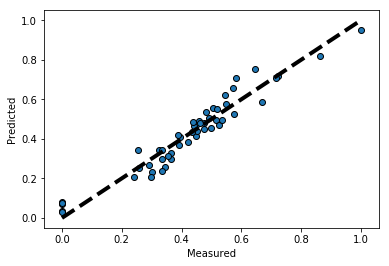

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Koyck Model

In [34]:
df_gameaccess = pd.read_csv("gameaccess.csv")

In [35]:
df_gameaccess.info()
df_gameaccess.shape
df_gameaccess.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,093,380.11","2,063,506.89","2,447.64","3,838,206.11","1,774,699.22",5.57,2.49,0.85,...,"6,694,684.72","2,121,103.87","3,133,967.11","161,775.85","242,663.77",48.47,"1,136.76",14.02,0.25,0.55
std,15.44,15.44,"985,015.25","973,414.67","1,387.43","1,982,451.54","1,034,633.71",0.91,0.54,0.28,...,"3,413,192.11","1,045,760.76","2,959,102.41","301,186.93","435,678.56",7.80,176.96,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"1,652,299.00","1,629,127.00","1,549.00","2,658,687.00","1,075,086.00",5.46,2.36,0.71,...,"4,032,785.34","1,341,376.06","1,807,830.05",0.00,0.00,46.93,"1,065.86",6.00,0.00,0.00
50%,26.00,53.00,"2,197,702.00","2,166,128.00","2,416.00","3,859,542.00","1,748,871.50",5.67,2.55,0.80,...,"8,146,156.33","2,591,409.68","2,156,032.09",0.00,0.00,48.79,"1,194.00",13.00,0.00,0.00
75%,39.00,66.00,"2,557,704.00","2,529,027.00","3,013.00","4,859,000.00","2,407,927.00",5.83,2.71,0.94,...,"9,329,621.50","2,830,316.33","2,864,752.26","257,632.26","347,458.06",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"4,935,168.80","4,865,197.80","7,797.00","9,665,991.00","4,800,793.20",8.00,4.00,2.28,...,"10,104,067.34","3,055,459.35","13,236,320.98","1,119,367.74","1,679,051.61",59.99,"1,242.00",30.00,3.00,7.00


In [36]:
df_gameaccess = df_gameaccess.loc[:, ~df_gameaccess.columns.str.contains('^Unnamed')]
df_gameaccess.head()
df_gameaccess.shape
df_gameaccess = df_gameaccess.dropna()
df_gameaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"455,657.61","189,484.11","1,884,505.32",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

In [37]:
df_gameaccess['gmv_Lag_1']=df_gameaccess['gmv'].shift(1)
df_gameaccess['gmv_Lag_1']=df_gameaccess['gmv_Lag_1'].fillna(df_gameaccess['gmv'].mean())

In [38]:
# Moving averages on Pricing & Promotional Offer Related KPIs
df_gameaccess['LP_MA_3']=df_gameaccess.list_price.rolling(window=3).mean()
df_gameaccess['LP_MA_5']=df_gameaccess.list_price.rolling(window=5).mean()
df_gameaccess['DISC_MA_3']=df_gameaccess.discount.rolling(window=3).mean()
df_gameaccess['DISC_MA_5']=df_gameaccess.discount.rolling(window=5).mean()
df_gameaccess['PM_MA_3']=df_gameaccess.product_mrp.rolling(window=3).mean()
df_gameaccess['PM_MA_5']=df_gameaccess.product_mrp.rolling(window=5).mean()

In [39]:
df_gameaccess['LP_MA_3']=df_gameaccess['LP_MA_3'].fillna(df_gameaccess['LP_MA_3'].mean())
df_gameaccess['LP_MA_5']=df_gameaccess['LP_MA_5'].fillna(df_gameaccess['LP_MA_5'].mean())
df_gameaccess['DISC_MA_3']=df_gameaccess['DISC_MA_3'].fillna(df_gameaccess['DISC_MA_3'].mean())
df_gameaccess['DISC_MA_5']=df_gameaccess['DISC_MA_5'].fillna(df_gameaccess['DISC_MA_5'].mean()) 
df_gameaccess['PM_MA_3']=df_gameaccess['PM_MA_3'].fillna(df_gameaccess['PM_MA_3'].mean())
df_gameaccess['PM_MA_5']=df_gameaccess['PM_MA_5'].fillna(df_gameaccess['PM_MA_5'].mean()) 

In [40]:
# as Moving averages are used Respective columns will be dropped
df_gameaccess=df_gameaccess.drop('list_price',axis=1)
df_gameaccess=df_gameaccess.drop('discount',axis=1)
df_gameaccess=df_gameaccess.drop('product_mrp',axis=1)

In [41]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [42]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_gameaccess.columns)
##num_vars.remove('gmv')
num_vars
df_gameaccess[num_vars] = scaler.fit_transform(df_gameaccess[num_vars])

['Week',
 'gmv',
 'units',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date',
 'gmv_Lag_1',
 'LP_MA_3',
 'LP_MA_5',
 'DISC_MA_3',
 'DISC_MA_5',
 'PM_MA_3',
 'PM_MA_5']

In [43]:
df_gameaccess.shape

(53, 28)

In [44]:
df_gameaccess.head()
df_gameaccess.describe()

,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_Lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
0,0.00,0.00,0.00,0.56,0.75,0.22,0.05,0.01,0.10,0.04,...,0.33,0.33,0.00,0.42,0.66,0.64,0.55,0.54,0.62,0.58
1,0.02,0.34,0.22,0.73,0.63,0.28,0.09,0.02,0.18,0.08,...,0.10,0.00,0.00,0.00,0.66,0.64,0.55,0.54,0.62,0.58
2,0.04,0.30,0.16,0.72,0.64,0.27,0.10,0.02,0.20,0.09,...,0.60,0.00,0.29,0.34,0.33,0.64,0.20,0.54,0.27,0.58
3,0.06,0.36,0.19,0.73,0.66,0.31,0.10,0.02,0.20,0.09,...,0.83,0.00,0.00,0.30,0.51,0.64,0.33,0.54,0.43,0.58
4,0.08,0.24,0.13,0.74,0.65,0.40,0.09,0.02,0.18,0.07,...,0.43,0.33,0.00,0.36,0.46,0.33,0.32,0.22,0.40,0.27


,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_Lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.42,0.31,0.70,0.62,0.37,0.41,0.40,0.19,0.36,...,0.47,0.08,0.08,0.43,0.66,0.64,0.55,0.54,0.62,0.58
std,0.30,0.20,0.18,0.11,0.13,0.12,0.24,0.27,0.23,0.28,...,0.31,0.20,0.21,0.20,0.23,0.23,0.25,0.24,0.24,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.33,0.20,0.68,0.59,0.31,0.30,0.17,0.09,0.15,...,0.20,0.00,0.00,0.34,0.59,0.62,0.43,0.45,0.53,0.53
50%,0.50,0.45,0.31,0.71,0.64,0.35,0.43,0.47,0.12,0.31,...,0.43,0.00,0.00,0.45,0.73,0.70,0.55,0.58,0.64,0.67
75%,0.75,0.52,0.39,0.73,0.68,0.41,0.57,0.58,0.18,0.49,...,0.73,0.00,0.00,0.52,0.82,0.78,0.71,0.69,0.79,0.72
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [45]:
y_train = df_gameaccess.pop('gmv')
X_train = df_gameaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                        0.00
Week                        -0.08
units                        1.01
sla                          0.34
product_procurement_sla     -0.02
% discount wrt list price   -0.04
Total Investment            -5.44
TV                           0.37
Digital                      1.23
Sponsorship                  3.18
Content Marketing           -0.60
Online marketing            -0.37
 Affiliates                  1.31
SEM                          0.58
Radio                        1.05
Other                        0.24
NPS                         -0.20
Stock_Index                 -0.09
pay_date_diff               -0.04
Holiday_flag                 0.03
Special_Sale_Date           -0.07
gmv_Lag_1                    0.02
LP_MA_3                     -0.45
LP_MA_5                      0.52
DISC_MA_3                    0.35
DISC_MA_5                   -0.37
PM_MA_3                     -0.04
PM_MA_5                      0.07
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     74.14
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.55e-19
Time:                        22:07:21   Log-Likelihood:                 123.16
No. Observations:                  53   AIC:                            -194.3
Df Residuals:                      27   BIC:                            -143.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0022      0.037      0.061      0.952      -0.073       0.078
Week                         -0.0801      0.049     -1.623      0.116      -0.181       0.021
units                         1.0090      0.058     17.461      0.000       0.890       1.128
sla                           0.3435      0.138      2.489      0.019       0.060       0.627
product_procurement_sla      -0.0215      0.088     -0.245      0.808      -0.202       0.159
% discount wrt list price    -0.0429      0.080     -0.537      0.595      -0.207       0.121
Total Investment             -5.4445      3.357     -1.622      0.116     -12.332       1.443
TV                            0.3747      0.377      0.993      0.330      -0.400       1.149
Digital                       1.2327      0.861      1.432      0.164      -0.533       2.999
Sponsorship                   3.1793      1.692      1.879      0.071      -0.293       6.652
Content Marketing            -0.5997      0.350     -1.713      0.098      -1.318       0.118
Online marketing             -0.3670      0.673     -0.545      0.590      -1.748       1.014
 Affiliates                   1.3065      0.525      2.490      0.019       0.230       2.383
SEM                           0.5830      0.353      1.650      0.111      -0.142       1.308
Radio                         1.0531      0.623      1.691      0.102      -0.224       2.331
Other                         0.2429      0.154      1.579      0.126      -0.073       0.559
NPS                          -0.1980      0.287     -0.689      0.496      -0.787       0.391
Stock_Index                  -0.0946      0.246     -0.384      0.704      -0.600       0.411
pay_date_diff                -0.0374      0.017     -2.228      0.034      -0.072      -0.003
Holiday_flag                  0.0349      0.040      0.873      0.390      -0.047       0.117
Special_Sale_Date            -0.0733      0.035     -2.073      0.048      -0.146      -0.001
gmv_Lag_1                     0.0151      0.048      0.311      0.758      -0.084       0.114
LP_MA_3                      -0.4528      0.250     -1.815      0.081      -0.965       0.059
LP_MA_5                       0.5232      0.250      2.096      0.046       0.011       1.035
DISC_MA_3                     0.3541      0.242      1.460      0.156      -0.143       0.852
DISC_MA_5                    -0.3650      0.251     -1.453      0.158      -0.880       0.150
PM_MA_3                      -0.0423      0.027     -1.569      0.128      -0.098       0.013
PM_MA_5                       0.0693      0.031      2.207      0.036       0.005       0.134
==============================================================================
Omnibus:                        3.409   Durbin-Watson:                   2.644
Prob(Omnibu

In [46]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,PM_MA_3,inf
23,DISC_MA_3,inf
21,LP_MA_3,inf
26,PM_MA_5,"823,551.54"
22,LP_MA_5,"227,290.28"
24,DISC_MA_5,"194,047.57"
5,Total Investment,"31,292.66"
8,Sponsorship,"10,750.55"
10,Online marketing,"2,438.99"
7,Digital,"1,865.60"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 5),
 ('units', True, 1),
 ('sla', False, 2),
 ('product_procurement_sla', False, 12),
 ('% discount wrt list price', False, 3),
 ('Total Investment', True, 1),
 ('TV', False, 4),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', True, 1),
 ('NPS', False, 7),
 ('Stock_Index', True, 1),
 ('pay_date_diff', False, 10),
 ('Holiday_flag', False, 11),
 ('Special_Sale_Date', False, 8),
 ('gmv_Lag_1', False, 13),
 ('LP_MA_3', True, 1),
 ('LP_MA_5', True, 1),
 ('DISC_MA_3', True, 1),
 ('DISC_MA_5', True, 1),
 ('PM_MA_3', False, 9),
 ('PM_MA_5', False, 6)]

Index(['units', 'Total Investment', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'Stock_Index', 'LP_MA_3', 'LP_MA_5', 'DISC_MA_3', 'DISC_MA_5'],
      dtype='object')

Index(['Week', 'sla', 'product_procurement_sla', '% discount wrt list price',
       'TV', 'NPS', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_Lag_1', 'PM_MA_3', 'PM_MA_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     97.89
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.31e-25
Time:                        22:07:22   Log-Likelihood:                 108.92
No. Observations:                  53   AIC:                            -185.8
Df Residuals:                      37   BIC:                            -154.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0020      0.03

,Features,VIF
2,Total Investment,"1,536.65"
7,Affiliates,884.19
4,Sponsorship,750.50
6,Online marketing,721.30
3,Digital,474.59
8,SEM,174.02
5,Content Marketing,149.06
9,Radio,142.24
15,DISC_MA_5,107.20
13,LP_MA_5,97.16


In [50]:
# Drop variable
X_train_new = X_train_rfe.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     93.17
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.80e-25
Time:                        22:07:22   Log-Likelihood:                 105.17
No. Observations:                  53   AIC:                            -180.3
Df Residuals:                      38   BIC:                            -150.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0168      0.03

,Features,VIF
5,Online marketing,681.24
6,Affiliates,502.46
7,SEM,163.83
2,Digital,139.86
4,Content Marketing,104.02
14,DISC_MA_5,92.91
12,LP_MA_5,89.02
11,LP_MA_3,74.14
13,DISC_MA_3,74.09
9,Other,52.71


In [51]:
# Drop variable
X_train_new = X_train_new.drop(['Online marketing'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.21e-26
Time:                        22:07:22   Log-Likelihood:                 105.02
No. Observations:                  53   AIC:                            -182.0
Df Residuals:                      39   BIC:                            -154.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0164      0.03

,Features,VIF
6,SEM,114.25
13,DISC_MA_5,92.76
11,LP_MA_5,88.75
4,Content Marketing,76.65
10,LP_MA_3,69.25
12,DISC_MA_3,66.92
0,const,51.75
2,Digital,50.67
8,Other,50.50
7,Radio,38.66


In [52]:
# Drop variable
X_train_new = X_train_new.drop(['SEM'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     91.83
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.47e-25
Time:                        22:07:23   Log-Likelihood:                 99.527
No. Observations:                  53   AIC:                            -173.1
Df Residuals:                      40   BIC:                            -147.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0373      0.04

,Features,VIF
12,DISC_MA_5,88.68
10,LP_MA_5,81.84
9,LP_MA_3,68.35
11,DISC_MA_3,66.54
0,const,50.04
7,Other,47.28
4,Content Marketing,44.02
6,Radio,37.26
2,Digital,33.11
3,Sponsorship,6.11


In [53]:
# Drop variable
X_train_new = X_train_new.drop(['DISC_MA_5'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.57e-26
Time:                        22:07:23   Log-Likelihood:                 99.432
No. Observations:                  53   AIC:                            -174.9
Df Residuals:                      41   BIC:                            -151.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0365      0.04

,Features,VIF
0,const,49.92
4,Content Marketing,42.02
7,Other,40.91
6,Radio,35.95
9,LP_MA_3,35.38
2,Digital,32.77
11,DISC_MA_3,24.95
10,LP_MA_5,9.81
3,Sponsorship,5.40
5,Affiliates,5.29


In [54]:
# Drop variable
X_train_new = X_train_new.drop(['Content Marketing'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     108.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.10e-26
Time:                        22:07:23   Log-Likelihood:                 97.868
No. Observations:                  53   AIC:                            -173.7
Df Residuals:                      42   BIC:                            -152.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0317      0.042     -0.764      

,Features,VIF
0,const,49.64
6,Other,35.27
5,Radio,35.23
8,LP_MA_3,27.87
10,DISC_MA_3,15.12
9,LP_MA_5,9.05
3,Sponsorship,4.40
4,Affiliates,3.02
1,units,2.60
2,Digital,2.29


In [55]:
# Drop variable
X_train_new = X_train_new.drop(['Other'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.07e-27
Time:                        22:07:23   Log-Likelihood:                 97.729
No. Observations:                  53   AIC:                            -175.5
Df Residuals:                      43   BIC:                            -155.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0302      0.041     -0.736      

,Features,VIF
0,const,49.33
7,LP_MA_3,25.74
9,DISC_MA_3,13.26
8,LP_MA_5,9.04
3,Sponsorship,4.19
4,Affiliates,3.01
1,units,2.59
2,Digital,2.29
5,Radio,2.00
6,Stock_Index,1.31


In [56]:
# Drop variable
X_train_new = X_train_new.drop(['LP_MA_3'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.57e-28
Time:                        22:07:24   Log-Likelihood:                 97.012
No. Observations:                  53   AIC:                            -176.0
Df Residuals:                      44   BIC:                            -158.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0356      0.041     -0.872      

,Features,VIF
0,const,48.60
8,DISC_MA_3,6.02
7,LP_MA_5,4.74
3,Sponsorship,3.32
4,Affiliates,2.92
1,units,2.58
2,Digital,2.24
5,Radio,1.98
6,Stock_Index,1.21


In [57]:
# Drop variable
X_train_new = X_train_new.drop(['DISC_MA_3'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.27e-28
Time:                        22:07:24   Log-Likelihood:                 92.147
No. Observations:                  53   AIC:                            -168.3
Df Residuals:                      45   BIC:                            -152.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0173      0.044     -0.395      

,Features,VIF
0,const,47.50
3,Sponsorship,3.07
4,Affiliates,2.90
1,units,2.27
2,Digital,2.17
7,LP_MA_5,2.06
5,Radio,1.72
6,Stock_Index,1.20


In [58]:
# Drop variable
X_train_new = X_train_new.drop(['Stock_Index'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.03e-28
Time:                        22:07:24   Log-Likelihood:                 91.424
No. Observations:                  53   AIC:                            -168.8
Df Residuals:                      46   BIC:                            -155.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0255      0.021      1.220      

,Features,VIF
0,const,10.85
3,Sponsorship,3.02
4,Affiliates,2.86
1,units,2.27
2,Digital,2.13
6,LP_MA_5,1.94
5,Radio,1.61


In [59]:
# Drop variable
X_train_new = X_train_new.drop([' Affiliates'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.20e-29
Time:                        22:07:24   Log-Likelihood:                 90.144
No. Observations:                  53   AIC:                            -168.3
Df Residuals:                      47   BIC:                            -156.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0225      0.021      1.063      

,Features,VIF
0,const,10.75
3,Sponsorship,2.20
2,Digital,2.07
1,units,1.93
5,LP_MA_5,1.84
4,Radio,1.31


In [60]:
# Drop variable
X_train_new = X_train_new.drop(['Radio'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.88e-30
Time:                        22:07:24   Log-Likelihood:                 88.728
No. Observations:                  53   AIC:                            -167.5
Df Residuals:                      48   BIC:                            -157.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0208      0.021      0.968      

,Features,VIF
0,const,10.72
3,Sponsorship,2.17
2,Digital,2.02
1,units,1.89
4,LP_MA_5,1.74


In [61]:
X_train_new.columns

Index(['const', 'units', 'Digital', 'Sponsorship', 'LP_MA_5'], dtype='object')

In [62]:
X_train_new=X_train_new.drop('const',axis=1)

In [63]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['SEM', 'Radio', 'PM_MA_3', '% discount wrt list price', 'Content Marketing', 'NPS', 'Week', 'PM_MA_5', 'TV', 'Total Investment', 'pay_date_diff', 'Special_Sale_Date', 'Stock_Index', ' Affiliates', 'gmv', 'product_procurement_sla', 'gmv_Lag_1', 'DISC_MA_5', 'Online marketing', 'DISC_MA_3', 'LP_MA_3', 'Other', 'Holiday_flag', 'sla']


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.98466835, 0.9169152 , 0.90778993, 0.98609882, 0.76127356,
       0.86525139, 0.88882698, 0.94924346, 0.89566627, 0.91683864])

In [65]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [66]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0029081575139162856
r_square_value : 0.9255938965088104


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

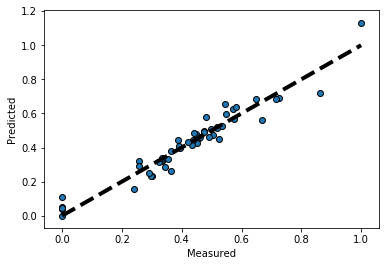

In [67]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Multiplicative Model

In [68]:
df_gameaccess = pd.read_csv("gameaccess.csv")

In [69]:
df_gameaccess.info()
df_gameaccess.shape
df_gameaccess.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,093,380.11","2,063,506.89","2,447.64","3,838,206.11","1,774,699.22",5.57,2.49,0.85,...,"6,694,684.72","2,121,103.87","3,133,967.11","161,775.85","242,663.77",48.47,"1,136.76",14.02,0.25,0.55
std,15.44,15.44,"985,015.25","973,414.67","1,387.43","1,982,451.54","1,034,633.71",0.91,0.54,0.28,...,"3,413,192.11","1,045,760.76","2,959,102.41","301,186.93","435,678.56",7.80,176.96,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"1,652,299.00","1,629,127.00","1,549.00","2,658,687.00","1,075,086.00",5.46,2.36,0.71,...,"4,032,785.34","1,341,376.06","1,807,830.05",0.00,0.00,46.93,"1,065.86",6.00,0.00,0.00
50%,26.00,53.00,"2,197,702.00","2,166,128.00","2,416.00","3,859,542.00","1,748,871.50",5.67,2.55,0.80,...,"8,146,156.33","2,591,409.68","2,156,032.09",0.00,0.00,48.79,"1,194.00",13.00,0.00,0.00
75%,39.00,66.00,"2,557,704.00","2,529,027.00","3,013.00","4,859,000.00","2,407,927.00",5.83,2.71,0.94,...,"9,329,621.50","2,830,316.33","2,864,752.26","257,632.26","347,458.06",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"4,935,168.80","4,865,197.80","7,797.00","9,665,991.00","4,800,793.20",8.00,4.00,2.28,...,"10,104,067.34","3,055,459.35","13,236,320.98","1,119,367.74","1,679,051.61",59.99,"1,242.00",30.00,3.00,7.00


In [70]:
df_gameaccess = df_gameaccess.loc[:, ~df_gameaccess.columns.str.contains('^Unnamed')]
df_gameaccess.head()
df_gameaccess.shape
df_gameaccess = df_gameaccess.dropna()
df_gameaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"455,657.61","189,484.11","1,884,505.32",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

In [71]:
df_gameaccess=df_gameaccess[df_gameaccess['gmv']!=0]

In [72]:
df_gameaccess.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

In [73]:
df_gameaccess=df_gameaccess.replace(0, 0.001)

In [74]:
df_gameaccess['Week'] = np.log(df_gameaccess['Week'])
df_gameaccess['gmv']=np.log(df_gameaccess['gmv'])
df_gameaccess['list_price']=np.log(df_gameaccess['list_price'])
df_gameaccess['product_mrp']=np.log(df_gameaccess['product_mrp'])
df_gameaccess['discount']=np.log(df_gameaccess['discount'])
df_gameaccess['units']=np.log(df_gameaccess['units'])
df_gameaccess['sla']=np.log(df_gameaccess['sla'])
df_gameaccess['Total Investment']=np.log(df_gameaccess['Total Investment'])
df_gameaccess['product_procurement_sla']=np.log(df_gameaccess['product_procurement_sla'])
df_gameaccess['% discount wrt list price']=np.log(df_gameaccess['% discount wrt list price'])
df_gameaccess['TV']=np.log(df_gameaccess['TV'])
df_gameaccess['Digital']=np.log(df_gameaccess['Digital'])
df_gameaccess['Sponsorship']=np.log(df_gameaccess['Sponsorship'])
df_gameaccess['Content Marketing']=np.log(df_gameaccess['Content Marketing'])
df_gameaccess['Online marketing']=np.log(df_gameaccess['Online marketing'])
df_gameaccess[' Affiliates']=np.log(df_gameaccess[' Affiliates'])
df_gameaccess['Radio']=np.log(df_gameaccess['Radio'])
df_gameaccess['Other']=np.log(df_gameaccess['Other'])
df_gameaccess['SEM']=np.log(df_gameaccess['SEM'])
df_gameaccess['SEM']=np.log(df_gameaccess['SEM'])
df_gameaccess['NPS']=np.log(df_gameaccess['NPS'])
df_gameaccess['Stock_Index']=np.log(df_gameaccess['Stock_Index'])
df_gameaccess['pay_date_diff']=np.log(df_gameaccess['pay_date_diff'])

<Figure size 1440x1080 with 0 Axes>

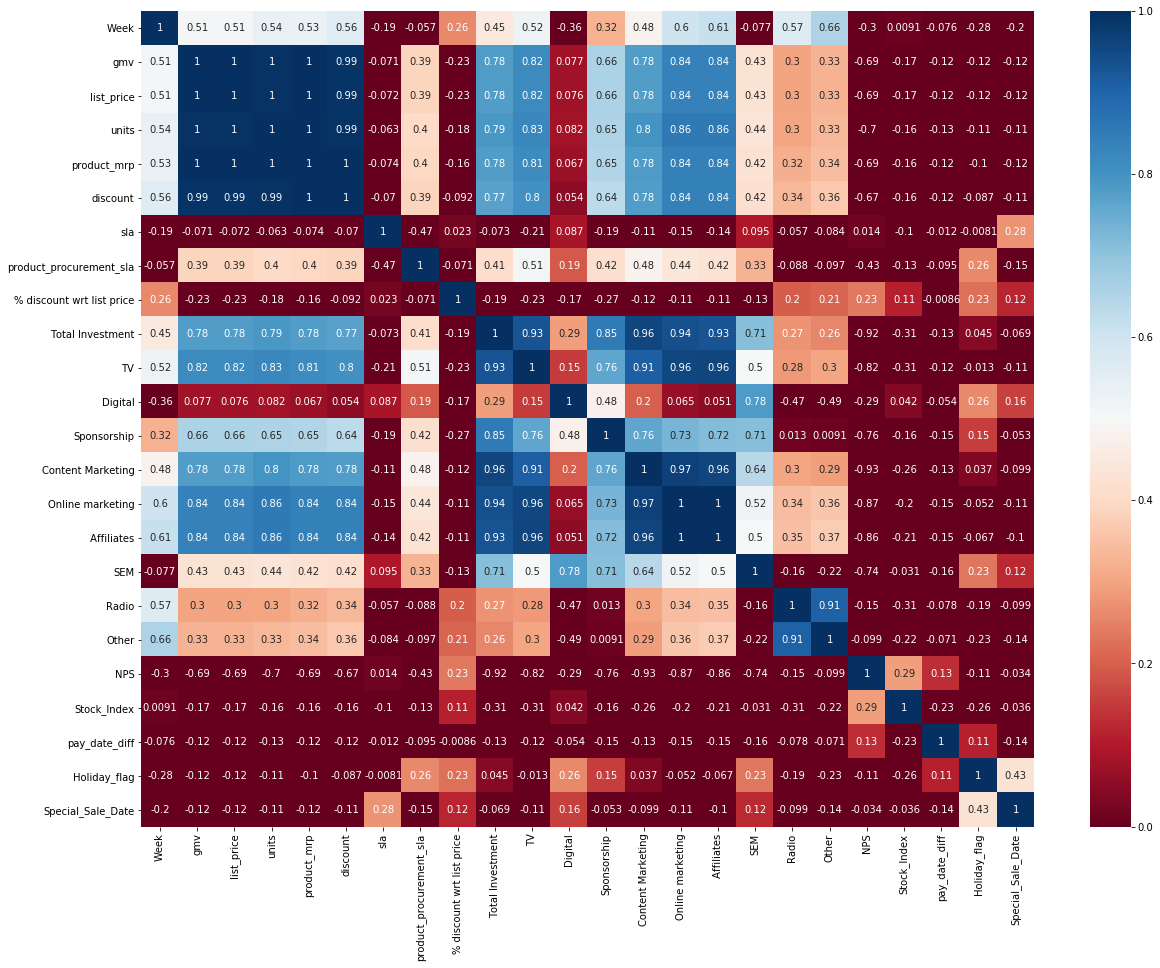

In [75]:
plt.figure(figsize=(20,15))
sns.heatmap(df_gameaccess.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [76]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_gameaccess.columns)
##num_vars.remove('gmv')
num_vars
df_gameaccess[num_vars] = scaler.fit_transform(df_gameaccess[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [77]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [78]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_gameaccess.columns)
##num_vars.remove('gmv')
num_vars
df_gameaccess[num_vars] = scaler.fit_transform(df_gameaccess[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [79]:
df_gameaccess.shape

(52, 24)

In [80]:
df_gameaccess.head()
df_gameaccess.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.13,0.13,0.09,0.10,0.06,0.00,0.79,0.00,0.13,...,0.30,0.27,0.00,0.00,0.00,0.69,0.73,0.89,0.33,0.00
1,0.03,0.86,0.86,0.81,0.84,0.81,0.45,0.67,0.16,0.32,...,0.43,0.41,0.26,0.00,0.00,0.69,0.73,0.78,0.00,0.00
2,0.07,0.85,0.85,0.77,0.82,0.79,0.42,0.68,0.13,0.35,...,0.44,0.44,0.30,0.00,0.00,0.69,0.73,0.95,0.00,0.29
3,0.10,0.87,0.87,0.79,0.85,0.83,0.45,0.70,0.22,0.35,...,0.44,0.44,0.30,0.00,0.00,0.69,0.73,0.98,0.00,0.00
4,0.13,0.82,0.82,0.74,0.81,0.81,0.48,0.69,0.38,0.30,...,0.41,0.40,0.26,0.00,0.00,0.78,0.77,0.92,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,...,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00,52.00
mean,0.59,0.83,0.83,0.79,0.82,0.81,0.40,0.66,0.32,0.69,...,0.85,0.85,0.38,0.34,0.39,0.35,0.64,0.84,0.08,0.08
std,0.29,0.23,0.23,0.23,0.22,0.22,0.14,0.15,0.16,0.24,...,0.26,0.26,0.23,0.46,0.46,0.25,0.34,0.26,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.38,0.86,0.86,0.80,0.84,0.81,0.35,0.63,0.22,0.66,...,0.90,0.89,0.26,0.00,0.00,0.19,0.36,0.84,0.00,0.00
50%,0.64,0.90,0.90,0.85,0.88,0.87,0.40,0.68,0.32,0.76,...,0.96,0.97,0.32,0.00,0.00,0.32,0.80,0.91,0.00,0.00
75%,0.84,0.92,0.92,0.88,0.91,0.91,0.45,0.72,0.41,0.84,...,0.98,0.98,0.43,0.93,0.93,0.43,0.92,0.97,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [81]:
y_train = df_gameaccess.pop('gmv')
X_train = df_gameaccess

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                        0.03
Week                         0.00
list_price                   0.48
units                       -0.00
product_mrp                  0.09
discount                     0.45
sla                          0.00
product_procurement_sla     -0.00
% discount wrt list price   -0.09
Total Investment            -0.00
TV                           0.00
Digital                      0.00
Sponsorship                 -0.00
Content Marketing            0.00
Online marketing             0.00
 Affiliates                 -0.00
SEM                          0.00
Radio                       -0.00
Other                        0.00
NPS                         -0.00
Stock_Index                  0.00
pay_date_diff               -0.00
Holiday_flag                 0.00
Special_Sale_Date           -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.925e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.02e-75
Time:                        22:07:33   Log-Likelihood:                 337.18
No. Observations:                  52   AIC:                            -628.4
Df Residuals:                      29   BIC:                            -583.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0339      0.002     20.484      0.000       0.031       0.037
Week                          0.0007      0.001      0.861      0.396      -0.001       0.002
list_price                    0.4768      0.050      9.590      0.000       0.375       0.579
units                        -0.0043      0.006     -0.752      0.458      -0.016       0.007
product_mrp                   0.0856      0.098      0.873      0.390      -0.115       0.286
discount                      0.4505      0.049      9.182      0.000       0.350       0.551
sla                           0.0004      0.001      0.538      0.595      -0.001       0.002
product_procurement_sla      -0.0010      0.002     -0.560      0.580      -0.004       0.003
% discount wrt list price    -0.0933      0.001    -85.018      0.000      -0.096      -0.091
Total Investment             -0.0013      0.005     -0.295      0.770      -0.011       0.008
TV                            0.0032      0.004      0.743      0.464      -0.006       0.012
Digital                       0.0006      0.002      0.294      0.771      -0.004       0.005
Sponsorship                  -0.0016      0.002     -1.047      0.304      -0.005       0.002
Content Marketing             0.0018      0.005      0.352      0.727      -0.009       0.012
Online marketing              0.0007      0.035      0.021      0.984      -0.071       0.073
 Affiliates                  -0.0048      0.031     -0.153      0.880      -0.068       0.059
SEM                        8.024e-05      0.003      0.029      0.977      -0.006       0.006
Radio                        -0.0004      0.000     -0.979      0.336      -0.001       0.000
Other                      7.885e-05      0.000      0.182      0.857      -0.001       0.001
NPS                          -0.0006      0.002     -0.404      0.689      -0.004       0.003
Stock_Index                4.063e-05      0.000      0.093      0.927      -0.001       0.001
pay_date_diff             -6.614e-06      0.000     -0.021      0.983      -0.001       0.001
Holiday_flag                  0.0008      0.001      1.169      0.252      -0.001       0.002
Special_Sale_Date            -0.0002      0.000     -0.321      0.750      -0.001       0.001
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.492
Skew:                           0.228   Prob(JB):                        0.782
Kurtosis:                       3.140   Cond. No.                     4.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [82]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,discount,"510,767.46"
1,list_price,"412,820.76"
3,product_mrp,"99,031.92"
13,Online marketing,"17,288.70"
14,Affiliates,"14,073.74"
7,% discount wrt list price,634.59
2,units,351.54
12,Content Marketing,307.67
8,Total Investment,245.93
9,TV,208.50


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 2),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', True, 1),
 ('% discount wrt list price', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', False, 6),
 ('Radio', False, 4),
 ('Other', False, 7),
 ('NPS', True, 1),
 ('Stock_Index', False, 8),
 ('pay_date_diff', False, 9),
 ('Holiday_flag', False, 3),
 ('Special_Sale_Date', False, 5)]

Index(['list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'NPS'],
      dtype='object')

Index(['Week', 'SEM', 'Radio', 'Other', 'Stock_Index', 'pay_date_diff',
       'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.730e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.23e-97
Time:                        22:07:35   Log-Likelihood:                 333.97
No. Observations:                  52   AIC:                            -637.9
Df Residuals:                      37   BIC:                            -608.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,list_price,inf
4,discount,inf
7,% discount wrt list price,inf
3,product_mrp,"88,675.82"
13,Online marketing,"7,534.83"
14,Affiliates,"6,793.85"
2,units,313.21
9,TV,96.08
12,Content Marketing,91.98
8,Total Investment,72.77


In [86]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.730e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.23e-97
Time:                        22:07:35   Log-Likelihood:                 333.97
No. Observations:                  52   AIC:                            -637.9
Df Residuals:                      37   BIC:                            -608.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,discount,"89,880.88"
2,product_mrp,"88,675.82"
12,Online marketing,"7,534.83"
13,Affiliates,"6,793.85"
0,const,"2,402.80"
6,% discount wrt list price,487.73
1,units,313.21
8,TV,96.08
11,Content Marketing,91.98
7,Total Investment,72.77


In [87]:
# Drop variable
X_train_new = X_train_new.drop(['discount'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.371e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.69e-89
Time:                        22:07:35   Log-Likelihood:                 297.47
No. Observations:                  52   AIC:                            -566.9
Df Residuals:                      38   BIC:                            -539.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
11,Online marketing,"7,385.84"
12,Affiliates,"6,664.57"
0,const,385.17
1,units,274.20
2,product_mrp,239.80
7,TV,92.16
10,Content Marketing,87.26
6,Total Investment,70.51
13,NPS,12.87
9,Sponsorship,12.52


In [88]:
# Drop variable
X_train_new = X_train_new.drop(['Online marketing'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.529e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.00e-91
Time:                        22:07:36   Log-Likelihood:                 296.39
No. Observations:                  52   AIC:                            -566.8
Df Residuals:                      39   BIC:                            -541.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,316.12
1,units,267.17
2,product_mrp,236.24
11,Affiliates,83.30
6,Total Investment,65.67
10,Content Marketing,49.99
7,TV,44.87
12,NPS,12.73
9,Sponsorship,6.87
4,product_procurement_sla,3.31


In [89]:
# Drop variable
X_train_new = X_train_new.drop(['product_mrp'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     896.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.17e-44
Time:                        22:07:36   Log-Likelihood:                 146.88
No. Observations:                  52   AIC:                            -269.8
Df Residuals:                      40   BIC:                            -246.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,281.04
10,Affiliates,78.91
5,Total Investment,57.30
9,Content Marketing,47.93
6,TV,44.82
11,NPS,12.73
8,Sponsorship,6.87
1,units,4.82
3,product_procurement_sla,3.31
7,Digital,2.35


In [90]:
# Drop variable
X_train_new = X_train_new.drop([' Affiliates'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     954.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.13e-45
Time:                        22:07:36   Log-Likelihood:                 145.39
No. Observations:                  52   AIC:                            -268.8
Df Residuals:                      41   BIC:                            -247.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,267.75
5,Total Investment,51.56
9,Content Marketing,26.19
6,TV,16.05
10,NPS,11.83
8,Sponsorship,6.78
1,units,3.72
3,product_procurement_sla,2.26
7,Digital,1.77
2,sla,1.74


In [91]:
# Drop variable
X_train_new = X_train_new.drop(['Total Investment'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     900.0
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.68e-45
Time:                        22:07:36   Log-Likelihood:                 140.52
No. Observations:                  52   AIC:                            -261.0
Df Residuals:                      42   BIC:                            -241.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,261.88
8,Content Marketing,19.23
9,NPS,10.31
5,TV,9.18
7,Sponsorship,4.14
1,units,3.66
3,product_procurement_sla,1.83
6,Digital,1.72
2,sla,1.66
4,% discount wrt list price,1.38


In [92]:
# Drop variable
X_train_new = X_train_new.drop(['Content Marketing'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     963.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.70e-46
Time:                        22:07:36   Log-Likelihood:                 138.62
No. Observations:                  52   AIC:                            -259.2
Df Residuals:                      43   BIC:                            -241.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,174.63
5,TV,6.43
7,Sponsorship,4.14
8,NPS,4.08
1,units,3.45
3,product_procurement_sla,1.83
6,Digital,1.72
2,sla,1.66
4,% discount wrt list price,1.09


In [93]:
# Drop variable
X_train_new = X_train_new.drop(['TV'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1068.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.15e-47
Time:                        22:07:36   Log-Likelihood:                 137.24
No. Observations:                  52   AIC:                            -258.5
Df Residuals:                      44   BIC:                            -242.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,143.71
6,Sponsorship,3.84
7,NPS,3.17
1,units,2.48
3,product_procurement_sla,1.79
5,Digital,1.65
2,sla,1.61
4,% discount wrt list price,1.09


In [94]:
# Drop variable
X_train_new = X_train_new.drop(['sla'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1271.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.76e-48
Time:                        22:07:37   Log-Likelihood:                 137.17
No. Observations:                  52   AIC:                            -260.3
Df Residuals:                      45   BIC:                            -246.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,84.91
5,Sponsorship,3.36
6,NPS,2.91
1,units,2.41
4,Digital,1.48
2,product_procurement_sla,1.28
3,% discount wrt list price,1.09


In [95]:
# Drop variable
X_train_new = X_train_new.drop(['product_procurement_sla'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1551.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.72e-50
Time:                        22:07:37   Log-Likelihood:                 137.04
No. Observations:                  52   AIC:                            -262.1
Df Residuals:                      46   BIC:                            -250.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,69.94
4,Sponsorship,3.34
5,NPS,2.87
1,units,2.36
3,Digital,1.47
2,% discount wrt list price,1.08


In [96]:
# Drop variable
X_train_new = X_train_new.drop(['Digital'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1909.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.36e-51
Time:                        22:07:37   Log-Likelihood:                 136.08
No. Observations:                  52   AIC:                            -262.2
Df Residuals:                      47   BIC:                            -252.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,67.32
4,NPS,2.87
3,Sponsorship,2.58
1,units,2.12
2,% discount wrt list price,1.08


In [97]:
# Drop variable
X_train_new = X_train_new.drop(['Sponsorship'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2532.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.94e-53
Time:                        22:07:37   Log-Likelihood:                 135.40
No. Observations:                  52   AIC:                            -262.8
Df Residuals:                      48   BIC:                            -255.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,45.48
3,NPS,2.02
1,units,1.98
2,% discount wrt list price,1.06


In [98]:
# Drop variable
X_train_new = X_train_new.drop(['NPS'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     3670.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.25e-54
Time:                        22:07:37   Log-Likelihood:                 133.99
No. Observations:                  52   AIC:                            -262.0
Df Residuals:                      49   BIC:                            -256.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,20.25
1,units,1.03
2,% discount wrt list price,1.03


In [99]:
X_train_new.columns

Index(['const', 'units', '% discount wrt list price'], dtype='object')

In [100]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [101]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['Sponsorship', 'SEM', 'Radio', 'discount', 'Content Marketing', 'product_mrp', 'NPS', 'Week', 'TV', 'Total Investment', 'pay_date_diff', 'Special_Sale_Date', 'Stock_Index', 'Digital', ' Affiliates', 'gmv', 'product_procurement_sla', 'Online marketing', 'Other', 'list_price', 'Holiday_flag', 'sla']


In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.98180931, 0.99923797, 0.99261322, 0.99101336, 0.98291547,
       0.89009601, 0.77222098, 0.93133136, 0.68147929, 0.75577388])

In [103]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [104]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0004989174523597174
r_square_value : 0.9902247445465303


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

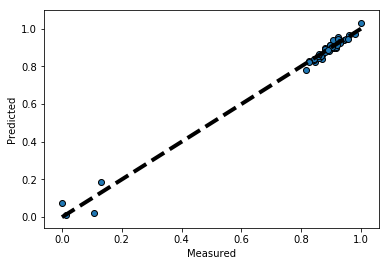

In [105]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Distributed Lag Model

In [106]:
lag_gameaccess = pd.read_csv("gameaccess.csv")
lag_gameaccess = lag_gameaccess.loc[:, ~lag_gameaccess.columns.str.contains('^Unnamed')]

In [107]:
lag_vars = ['gmv','list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date']

gameaccess_temp1 = lag_gameaccess[lag_vars].shift(1)
gameaccess_temp2 = lag_gameaccess[lag_vars].shift(2)
gameaccess_temp1.columns = ['gmv_lag_1','list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1', 'discount_lag_1', 'sla_lag_1',
       'product_procurement_sla_lag_1', '% discount wrt list price_lag_1',
       'Total Investment_lag_1', 'TV_lag_1', 'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1', 'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1',
       'Stock_Index_lag_1', 'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1']
gameaccess_temp2.columns = ['gmv_lag_2','list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2', 'discount_lag_2', 'sla_lag_2',
       'product_procurement_sla_lag_2', '% discount wrt list price_lag_2',
       'Total Investment_lag_2', 'TV_lag_2', 'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2', 'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2',
       'Stock_Index_lag_2', 'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']

gameaccess_temp1.head()
gameaccess_temp2.head()

,gmv_lag_1,list_price_lag_1,units_lag_1,product_mrp_lag_1,discount_lag_1,sla_lag_1,product_procurement_sla_lag_1,% discount wrt list price_lag_1,Total Investment_lag_1,TV_lag_1,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70","42,510.35",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93","80,769.66",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87","89,271.73",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87","89,271.73",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


,gmv_lag_2,list_price_lag_2,units_lag_2,product_mrp_lag_2,discount_lag_2,sla_lag_2,product_procurement_sla_lag_2,% discount wrt list price_lag_2,Total Investment_lag_2,TV_lag_2,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70","42,510.35",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93","80,769.66",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87","89,271.73",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


In [108]:
lag_gameaccess = pd.concat([lag_gameaccess,gameaccess_temp1],axis=1)
lag_gameaccess.head()
lag_gameaccess.shape
lag_gameaccess = lag_gameaccess[pd.notnull(lag_gameaccess['product_mrp_lag_1'])]
lag_gameaccess.shape
lag_gameaccess = pd.concat([lag_gameaccess,gameaccess_temp2],axis=1)
lag_gameaccess.head()
lag_gameaccess.shape
lag_gameaccess = lag_gameaccess[pd.notnull(lag_gameaccess['product_mrp_lag_2'])]
lag_gameaccess.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,27,"5,546.00","5,546.00",6.00,"8,396.00","2,850.00",4.50,3.00,0.51,"3,368,324.70",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,29,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,30,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,31,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


(53, 47)

(52, 47)

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28.00,"1,694,057.00","1,656,146.00","1,714.00","2,731,232.00","1,075,086.00",5.83,2.53,0.65,"6,399,816.93",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,29.00,"1,483,796.00","1,461,141.00","1,278.00","2,375,543.00","914,402.00",5.75,2.58,0.63,"7,073,481.87",...,"262,030.29","108,038.50","991,775.11",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,30.00,"1,793,620.50","1,766,909.50","1,503.00","3,022,712.00","1,255,802.50",5.83,2.64,0.71,"7,073,481.87",...,"497,857.54","205,273.16","1,884,372.71",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,31.00,"1,186,521.00","1,156,103.00","1,024.00","2,206,675.00","1,050,572.00",5.92,2.61,0.91,"6,126,068.81",...,"550,263.60","226,880.86","2,082,727.73",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


(53, 70)

(51, 70)

In [109]:
lag_gameaccess.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_1', 'list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1',
       'discount_lag_1', 'sla_lag_1', 'product_procurement_sla_lag_1',
       '% discount wrt list price_lag_1', 'Total Investment_lag_1', 'TV_lag_1',
       'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1',
       'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1', 'Stock_Index_lag_1',
       'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2'

In [110]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Get list of columns and remove 'gmv' column (Y)

num_vars = ['gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_1', 'list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1',
       'discount_lag_1', 'sla_lag_1', 'product_procurement_sla_lag_1',
       '% discount wrt list price_lag_1', 'Total Investment_lag_1', 'TV_lag_1',
       'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1',
       'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1', 'Stock_Index_lag_1',
       'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       '% discount wrt list price_lag_2', 'Total Investment_lag_2', 'TV_lag_2',
       'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2',
       'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2', 'Stock_Index_lag_2',
       'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']
game_lag_scaled = lag_gameaccess
game_lag_scaled[num_vars] = scaler.fit_transform(game_lag_scaled[num_vars])

In [111]:
# Running RFE with the output number of the variable equal to 20
y_g_lag_train = game_lag_scaled['gmv']
X_g_lag_train = game_lag_scaled.drop(['gmv'],axis=1)
lm = LinearRegression()
lm.fit(X_g_lag_train, y_g_lag_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_g_lag_train, y_g_lag_train)
list(zip(X_g_lag_train.columns,rfe.support_,rfe.ranking_))
col = X_g_lag_train.columns[rfe.support_]
col
X_g_lag_train.columns[~rfe.support_] # shows that all columns are taken into consideration

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[('Week', False, 50),
 ('list_price', True, 1),
 ('units', False, 10),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', False, 24),
 ('product_procurement_sla', False, 29),
 ('% discount wrt list price', False, 4),
 ('Total Investment', False, 47),
 ('TV', False, 23),
 ('Digital', False, 5),
 ('Sponsorship', False, 8),
 ('Content Marketing', False, 2),
 ('Online marketing', False, 30),
 (' Affiliates', False, 40),
 ('SEM', True, 1),
 ('Radio', False, 18),
 ('Other', False, 25),
 ('NPS', False, 32),
 ('Stock_Index', True, 1),
 ('pay_date_diff', False, 17),
 ('Holiday_flag', False, 41),
 ('Special_Sale_Date', False, 21),
 ('gmv_lag_1', True, 1),
 ('list_price_lag_1', True, 1),
 ('units_lag_1', False, 46),
 ('product_mrp_lag_1', True, 1),
 ('discount_lag_1', True, 1),
 ('sla_lag_1', False, 12),
 ('product_procurement_sla_lag_1', True, 1),
 ('% discount wrt list price_lag_1', True, 1),
 ('Total Investment_lag_1', True, 1),
 ('TV_lag_1', False, 45),
 ('Digital_lag_1', False, 20),

Index(['list_price', 'product_mrp', 'discount', 'SEM', 'Stock_Index',
       'gmv_lag_1', 'list_price_lag_1', 'product_mrp_lag_1', 'discount_lag_1',
       'product_procurement_sla_lag_1', '% discount wrt list price_lag_1',
       'Total Investment_lag_1', 'Sponsorship_lag_1', 'Online marketing_lag_1',
       ' Affiliates_lag_1', 'Other_lag_1', '% discount wrt list price_lag_2',
       'Total Investment_lag_2', 'SEM_lag_2', 'Stock_Index_lag_2'],
      dtype='object')

Index(['Week', 'units', 'sla', 'product_procurement_sla',
       '% discount wrt list price', 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates',
       'Radio', 'Other', 'NPS', 'pay_date_diff', 'Holiday_flag',
       'Special_Sale_Date', 'units_lag_1', 'sla_lag_1', 'TV_lag_1',
       'Digital_lag_1', 'Content Marketing_lag_1', 'SEM_lag_1', 'Radio_lag_1',
       'NPS_lag_1', 'Stock_Index_lag_1', 'pay_date_diff_lag_1',
       'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1', 'gmv_lag_2',
       'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       'TV_lag_2', 'Digital_lag_2', 'Sponsorship_lag_2',
       'Content Marketing_lag_2', 'Online marketing_lag_2',
       ' Affiliates_lag_2', 'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2',
       'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2'],
      dtype='object')

In [112]:
### Building model using statsmodel, for the detailed statistics

# Creating X_test dataframe with RFE selected variables
X_g_lag_train_rfe = X_g_lag_train[col]
#X_c_lag_train_rfe = X_c_lag_train[col]

# Adding a constant variable
import statsmodels.api as sm
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

# Running the linear model
lm = sm.OLS(y_g_lag_train, X_g_lag_train_lm).fit()
# Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_lm.values, i) for i in range(X_g_lag_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.358e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.58e-66
Time:                        22:07:40   Log-Likelihood:                 274.78
No. Observations:                  51   AIC:                            -511.6
Df Residuals:                      32   BIC:                            -474.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
2,product_mrp,inf
3,discount,inf
7,list_price_lag_1,inf
8,product_mrp_lag_1,inf
9,discount_lag_1,inf
1,list_price,inf
6,gmv_lag_1,"23,084.22"
15,Affiliates_lag_1,575.88
14,Online marketing_lag_1,503.60
0,const,275.36


In [113]:
# 'product_mrp' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["product_mrp"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.358e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.58e-66
Time:                        22:07:40   Log-Likelihood:                 274.78
No. Observations:                  51   AIC:                            -511.6
Df Residuals:                      32   BIC:                            -474.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,list_price_lag_1,inf
6,product_mrp_lag_1,inf
7,discount_lag_1,inf
4,gmv_lag_1,"132,769.35"
13,Affiliates_lag_1,"3,282.37"
12,Online marketing_lag_1,"2,713.62"
10,Total Investment_lag_1,796.03
11,Sponsorship_lag_1,421.63
18,Stock_Index_lag_2,221.73
8,product_procurement_sla_lag_1,163.35


In [114]:
# 'list_price_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["list_price_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.358e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.58e-66
Time:                        22:07:40   Log-Likelihood:                 274.78
No. Observations:                  51   AIC:                            -511.6
Df Residuals:                      32   BIC:                            -474.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
5,product_mrp_lag_1,"467,581.32"
4,gmv_lag_1,"132,769.35"
6,discount_lag_1,"104,651.75"
12,Affiliates_lag_1,"3,282.37"
11,Online marketing_lag_1,"2,713.62"
9,Total Investment_lag_1,796.03
10,Sponsorship_lag_1,421.63
17,Stock_Index_lag_2,221.73
7,product_procurement_sla_lag_1,163.35
15,Total Investment_lag_2,125.23


In [115]:
# 'product_mrp_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["product_mrp_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.656e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.12e-68
Time:                        22:07:40   Log-Likelihood:                 273.92
No. Observations:                  51   AIC:                            -511.8
Df Residuals:                      33   BIC:                            -477.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
11,Affiliates_lag_1,"3,097.96"
10,Online marketing_lag_1,"2,627.07"
8,Total Investment_lag_1,637.63
9,Sponsorship_lag_1,344.10
4,gmv_lag_1,225.01
16,Stock_Index_lag_2,221.57
5,discount_lag_1,155.85
6,product_procurement_sla_lag_1,149.61
14,Total Investment_lag_2,115.28
0,list_price,112.53


In [116]:
# 'Affiliates_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop([" Affiliates_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.543e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.88e-70
Time:                        22:07:41   Log-Likelihood:                 271.10
No. Observations:                  51   AIC:                            -508.2
Df Residuals:                      34   BIC:                            -475.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
8,Total Investment_lag_1,315.84
15,Stock_Index_lag_2,221.54
4,gmv_lag_1,206.32
5,discount_lag_1,143.25
6,product_procurement_sla_lag_1,139.64
0,list_price,104.37
9,Sponsorship_lag_1,98.57
1,discount,76.60
13,Total Investment_lag_2,60.96
12,% discount wrt list price_lag_2,59.30


In [117]:
# 'Total Investment_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Total Investment_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.712e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.47e-72
Time:                        22:07:41   Log-Likelihood:                 269.48
No. Observations:                  51   AIC:                            -507.0
Df Residuals:                      35   BIC:                            -476.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
14,Stock_Index_lag_2,218.29
4,gmv_lag_1,195.08
6,product_procurement_sla_lag_1,139.59
5,discount_lag_1,135.55
0,list_price,100.29
1,discount,75.41
12,Total Investment_lag_2,60.55
11,% discount wrt list price_lag_2,58.76
7,% discount wrt list price_lag_1,55.21
3,Stock_Index,53.15


In [118]:
# 'Stock_Index_lag_2' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Stock_Index_lag_2"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.925e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.12e-72
Time:                        22:07:41   Log-Likelihood:                 263.22
No. Observations:                  51   AIC:                            -496.4
Df Residuals:                      36   BIC:                            -467.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
4,gmv_lag_1,189.00
5,discount_lag_1,133.87
0,list_price,94.89
6,product_procurement_sla_lag_1,84.09
1,discount,70.10
12,Total Investment_lag_2,59.50
7,% discount wrt list price_lag_1,38.61
9,Online marketing_lag_1,33.68
3,Stock_Index,27.96
8,Sponsorship_lag_1,18.62


In [119]:
# 'gmv_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["gmv_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.444e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.78e-75
Time:                        22:07:41   Log-Likelihood:                 263.19
No. Observations:                  51   AIC:                            -498.4
Df Residuals:                      37   BIC:                            -471.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
0,list_price,80.16
1,discount,56.82
11,Total Investment_lag_2,54.67
5,product_procurement_sla_lag_1,53.71
8,Online marketing_lag_1,32.68
3,Stock_Index,27.93
6,% discount wrt list price_lag_1,23.25
7,Sponsorship_lag_1,18.24
12,SEM_lag_2,12.49
10,% discount wrt list price_lag_2,8.77


In [120]:
# 'list_price' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["list_price"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     44.98
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.07e-18
Time:                        22:07:41   Log-Likelihood:                 81.185
No. Observations:                  51   AIC:                            -136.4
Df Residuals:                      38   BIC:                            -111.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
10,Total Investment_lag_2,54.53
4,product_procurement_sla_lag_1,49.22
7,Online marketing_lag_1,32.68
2,Stock_Index,26.97
5,% discount wrt list price_lag_1,21.01
6,Sponsorship_lag_1,18.11
11,SEM_lag_2,12.45
0,discount,8.80
9,% discount wrt list price_lag_2,8.74
3,discount_lag_1,7.81


In [121]:
# 'Total Investment_lag_2' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Total Investment_lag_2"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     50.27
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.52e-19
Time:                        22:07:41   Log-Likelihood:                 81.140
No. Observations:                  51   AIC:                            -138.3
Df Residuals:                      39   BIC:                            -115.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
4,product_procurement_sla_lag_1,48.14
2,Stock_Index,25.90
7,Online marketing_lag_1,23.33
5,% discount wrt list price_lag_1,20.74
6,Sponsorship_lag_1,10.66
0,discount,8.67
9,% discount wrt list price_lag_2,8.52
3,discount_lag_1,7.76
1,SEM,6.19
10,SEM_lag_2,4.33


In [122]:
# 'product_procurement_sla_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["product_procurement_sla_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     53.33
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.03e-20
Time:                        22:07:42   Log-Likelihood:                 79.680
No. Observations:                  51   AIC:                            -137.4
Df Residuals:                      40   BIC:                            -116.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
6,Online marketing_lag_1,21.69
2,Stock_Index,12.29
4,% discount wrt list price_lag_1,11.41
5,Sponsorship_lag_1,9.82
8,% discount wrt list price_lag_2,8.26
0,discount,8.23
3,discount_lag_1,7.52
1,SEM,6.10
9,SEM_lag_2,4.33
7,Other_lag_1,2.38


In [123]:
# 'Online marketing_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Online marketing_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     59.89
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.73e-21
Time:                        22:07:42   Log-Likelihood:                 79.345
No. Observations:                  51   AIC:                            -138.7
Df Residuals:                      41   BIC:                            -119.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
2,Stock_Index,12.11
4,% discount wrt list price_lag_1,11.33
5,Sponsorship_lag_1,8.47
7,% discount wrt list price_lag_2,8.20
3,discount_lag_1,6.57
1,SEM,6.09
0,discount,6.04
8,SEM_lag_2,3.98
6,Other_lag_1,1.78


In [124]:
# 'Stock_Index' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Stock_Index"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     66.79
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.12e-21
Time:                        22:07:42   Log-Likelihood:                 78.571
No. Observations:                  51   AIC:                            -139.1
Df Residuals:                      42   BIC:                            -121.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,% discount wrt list price_lag_1,8.86
4,Sponsorship_lag_1,8.32
6,% discount wrt list price_lag_2,7.95
2,discount_lag_1,6.51
1,SEM,6.02
0,discount,5.76
7,SEM_lag_2,3.98
5,Other_lag_1,1.77


In [125]:
# '% discount wrt list price_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["% discount wrt list price_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     72.31
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.06e-21
Time:                        22:07:42   Log-Likelihood:                 76.740
No. Observations:                  51   AIC:                            -137.5
Df Residuals:                      43   BIC:                            -122.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
3,Sponsorship_lag_1,8.26
2,discount_lag_1,6.10
1,SEM,5.98
0,discount,5.58
5,% discount wrt list price_lag_2,4.30
6,SEM_lag_2,3.97
4,Other_lag_1,1.76


In [126]:
# 'Sponsorship_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Sponsorship_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     79.23
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.06e-22
Time:                        22:07:43   Log-Likelihood:                 74.731
No. Observations:                  51   AIC:                            -135.5
Df Residuals:                      44   BIC:                            -121.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
2,discount_lag_1,5.94
0,discount,5.39
4,% discount wrt list price_lag_2,4.27
5,SEM_lag_2,3.65
1,SEM,3.62
3,Other_lag_1,1.63


In [127]:
# 'discount_lag_1' is having high vif 

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["discount_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     96.90
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.24e-23
Time:                        22:07:43   Log-Likelihood:                 74.648
No. Observations:                  51   AIC:                            -137.3
Df Residuals:                      45   BIC:                            -125.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
0,discount,4.23
3,% discount wrt list price_lag_2,3.75
1,SEM,3.62
4,SEM_lag_2,3.51
2,Other_lag_1,1.54


In [128]:
# 'SEM' is having high P-Value

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["SEM"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.63e-24
Time:                        22:07:43   Log-Likelihood:                 74.567
No. Observations:                  51   AIC:                            -139.1
Df Residuals:                      46   BIC:                            -129.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
2,% discount wrt list price_lag_2,3.75
0,discount,3.73
3,SEM_lag_2,2.09
1,Other_lag_1,1.50


In [129]:
# 'SEM_lag_2' is having high P-Value

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["SEM_lag_2"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.21e-25
Time:                        22:07:43   Log-Likelihood:                 73.777
No. Observations:                  51   AIC:                            -139.6
Df Residuals:                      47   BIC:                            -131.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
0,discount,3.41
2,% discount wrt list price_lag_2,3.33
1,Other_lag_1,1.44


In [130]:
# 'Other_lag_1' is having high P-Value

X_g_lag_train_rfe= X_g_lag_train_rfe.drop(["Other_lag_1"],axis=1)
X_g_lag_train_lm = sm.add_constant(X_g_lag_train_rfe)

lm = sm.OLS(y_g_lag_train,X_g_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_g_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_g_lag_train_rfe.values, i) for i in range(X_g_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.21e-25
Time:                        22:07:43   Log-Likelihood:                 72.742
No. Observations:                  51   AIC:                            -139.5
Df Residuals:                      48   BIC:                            -133.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,Features,VIF
0,discount,3.25
1,% discount wrt list price_lag_2,3.25


In [131]:
X_g_lag_train_rfe.columns

Index(['discount', '% discount wrt list price_lag_2'], dtype='object')

In [132]:
drop_columns_list = list(set(num_vars) - set(list(X_g_lag_train_rfe.columns)))
print(drop_columns_list)

['Sponsorship', 'SEM', 'product_procurement_sla_lag_2', 'SEM_lag_1', '% discount wrt list price', ' Affiliates_lag_2', 'Holiday_flag_lag_2', 'pay_date_diff', 'Special_Sale_Date', 'sla_lag_2', 'list_price_lag_1', 'Content Marketing_lag_2', 'product_procurement_sla', ' Affiliates_lag_1', 'units_lag_2', 'Total Investment', 'list_price', 'Stock_Index_lag_1', 'list_price_lag_2', 'Online marketing_lag_1', 'TV_lag_2', 'TV', 'Special_Sale_Date_lag_1', 'Total Investment_lag_1', 'Online marketing_lag_2', 'Stock_Index', 'sla_lag_1', 'NPS_lag_2', 'product_mrp_lag_2', 'TV_lag_1', 'NPS', 'Radio', 'gmv_lag_2', 'Radio_lag_1', 'product_mrp', 'NPS_lag_1', 'Stock_Index_lag_2', 'Special_Sale_Date_lag_2', 'units_lag_1', 'pay_date_diff_lag_2', '% discount wrt list price_lag_1', 'product_procurement_sla_lag_1', 'Sponsorship_lag_1', 'Other_lag_1', 'Holiday_flag_lag_1', 'Total Investment_lag_2', 'SEM_lag_2', 'pay_date_diff_lag_1', 'product_mrp_lag_1', 'discount_lag_1', 'Other', 'Digital_lag_2', 'sla', 'gmv_lag

In [133]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_g_lag_train_rfe, y_g_lag_train, scoring='r2', cv=folds)
scores

array([0.90951267, 0.90057776, 0.75468228, 0.7407103 , 0.38529444,
       0.95505897, 0.9373567 , 0.95268794, 0.85190231, 0.74279331])

In [134]:
y_pred = cross_val_predict(lm, X_g_lag_train_rfe, y_g_lag_train, cv=folds)

In [135]:
mse = mean_squared_error(y_g_lag_train, y_pred)
r_squared = r2_score(y_g_lag_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.003776641173602801
r_square_value : 0.8976030934307487


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

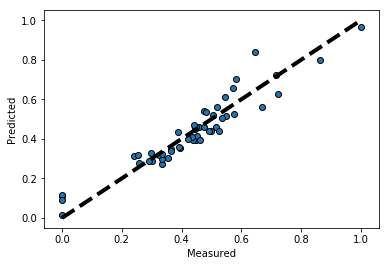

In [136]:
fig, ax = plt.subplots()
ax.scatter(y_g_lag_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_g_lag_train.min(), y_g_lag_train.max()], [y_g_lag_train.min(), y_g_lag_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()